# Part I - Exploration of Prosper Loan Dataset
## by Akinwale Akinjiola

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pre">Preliminary</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#con">Conclusion</a></li>
</ul>

## Introduction
> This [Prosper Loan Dataset]() consists of information on 113,937 loan transactions, with 81 associated variables\characteristics on each loan including amount, interest rate, current status, borrower income, and many others.

<a id='pre'></a>
## Preliminary Wrangling

In [196]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [197]:
##loading the dataset
df = pd.read_csv("prosperLoanData.csv")

In [198]:
##Shape of the data
df.shape

(113937, 81)

In [199]:
##Column names in the dataset
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> The Prosper Loan Dataset has 113937 observations and 81 variables

### What is/are the main feature(s) of interest in your dataset?

> - The characteristics of the Prosper Loan e.g duration, borrowers 
> - The distribution of the occupation and employement status of the loan borrowers, as well as the completion rate of the loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - `Term`
> - `LoanStatus`
> - `LoanOriginationQuarter`
> - `BorrowerRate`
> - `Occupation`
> - `EmploymentStatus`
> - `LoanOriginationAmount`

In [209]:
## Pooling the columns of interest for the project
focus_df = df.copy()[['ListingKey', 'Term', 'LoanStatus',
                'LoanOriginationQuarter', 'BorrowerRate',
              'Occupation', 'EmploymentStatus', 'LoanOriginalAmount']]
focus_df.head()

,ListingKey,Term,LoanStatus,LoanOriginationQuarter,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount
0,1021339766868145413AB3B,36,Completed,Q3 2007,0.1580,Other,Self-employed,9425
1,10273602499503308B223C1,36,Current,Q1 2014,0.0920,Professional,Employed,10000
2,0EE9337825851032864889A,36,Completed,Q1 2007,0.2750,Other,Not available,3001
3,0EF5356002482715299901A,36,Current,Q4 2012,0.0974,Skilled Labor,Employed,10000
4,0F023589499656230C5E3E2,36,Current,Q3 2013,0.2085,Executive,Employed,15000


##### Are there any duplicates in the data of interest?

In [210]:
focus_df.duplicated().sum(), round(focus_df.duplicated().sum()/focus_df.shape[0], 4)

(871, 0.0076)

##### Drop duplicates _(~0.0076% of the data)_ from the data of interest

In [211]:
focus_df.drop_duplicates(inplace=True)

In [212]:
focus_df.shape

(113066, 8)

##### Are there missing values in the data of interest?

In [213]:
focus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ListingKey              113066 non-null  object 
 1   Term                    113066 non-null  int64  
 2   LoanStatus              113066 non-null  object 
 3   LoanOriginationQuarter  113066 non-null  object 
 4   BorrowerRate            113066 non-null  float64
 5   Occupation              109537 non-null  object 
 6   EmploymentStatus        110811 non-null  object 
 7   LoanOriginalAmount      113066 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 7.8+ MB


In [214]:
## Missing values by selected columns
def MissingValuesAsTable( df ):
    df_table = pd.DataFrame(focus_df.isnull().sum())
    df_table['Proportion'] = round(df_table[0]/len(focus_df)*100, 2)
    return df_table
MissingValuesAsTable( focus_df )

,0,Proportion
ListingKey,0,0.00
Term,0,0.00
LoanStatus,0,0.00
LoanOriginationQuarter,0,0.00
BorrowerRate,0,0.00
Occupation,3529,3.12
EmploymentStatus,2255,1.99
LoanOriginalAmount,0,0.00


- _Occupation and EmploymentStatus have missing values of ~3.12% and ~1.99% of the whole data respectively. Dropping this rows may result in loss of information._
- _Missing columns in Occupation and EmploymentStatus will be filled with `Other` and `Not Available` respectively_

##### Fill missing columns in Occupation and EmploymentStatus with `Other` and `Not Available` respectively

In [215]:
focus_df.Occupation.fillna('Other', inplace=True)
focus_df.EmploymentStatus.fillna('Not Available', inplace=True)
MissingValuesAsTable( focus_df )

,0,Proportion
ListingKey,0,0.0
Term,0,0.0
LoanStatus,0,0.0
LoanOriginationQuarter,0,0.0
BorrowerRate,0,0.0
Occupation,0,0.0
EmploymentStatus,0,0.0
LoanOriginalAmount,0,0.0


In [216]:
## Rename the 'Term' to 'LoanTerm'
## Rename the 'LoanOriginationQuarter' to 'LoanOriginationQuarterYear'
focus_df = focus_df.rename(columns={'Term': 'LoanTerm', 'LoanOriginationQuarter': 'LoanOriginationQuarterYear'})

In [217]:
## Split the 'LoanOriginationQuarter' into the Quarter and Year
focus_df[['LoanOriginationQuarter', 'LoanOriginationYear']] = focus_df.LoanOriginationQuarterYear.str.split(expand=True)
focus_df.drop(['LoanOriginationQuarterYear'], axis=1, inplace=True)
focus_df.head()

,ListingKey,LoanTerm,LoanStatus,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,LoanOriginationQuarter,LoanOriginationYear
0,1021339766868145413AB3B,36,Completed,0.1580,Other,Self-employed,9425,Q3,2007
1,10273602499503308B223C1,36,Current,0.0920,Professional,Employed,10000,Q1,2014
2,0EE9337825851032864889A,36,Completed,0.2750,Other,Not available,3001,Q1,2007
3,0EF5356002482715299901A,36,Current,0.0974,Skilled Labor,Employed,10000,Q4,2012
4,0F023589499656230C5E3E2,36,Current,0.2085,Executive,Employed,15000,Q3,2013


In [218]:
## Convert the 'LoanTerm', 'LoanOriginationQuarter' and 'LoanOriginationYear' to categorical data
focus_df['LoanTerm'] = pd.Categorical(focus_df['LoanTerm'], categories = sorted(focus_df['LoanTerm'].value_counts().index))
focus_df['LoanOriginationQuarter'] = pd.Categorical(focus_df['LoanOriginationQuarter'], categories = ['Q1', 'Q2', 'Q3', 'Q4'])
focus_df['LoanOriginationYear'] = focus_df['LoanOriginationYear'].astype('int64')
focus_df['LoanOriginationYear'] = pd.Categorical(focus_df['LoanOriginationYear'], categories = sorted(focus_df['LoanOriginationYear'].value_counts().index))

In [219]:
focus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ListingKey              113066 non-null  object  
 1   LoanTerm                113066 non-null  category
 2   LoanStatus              113066 non-null  object  
 3   BorrowerRate            113066 non-null  float64 
 4   Occupation              113066 non-null  object  
 5   EmploymentStatus        113066 non-null  object  
 6   LoanOriginalAmount      113066 non-null  int64   
 7   LoanOriginationQuarter  113066 non-null  category
 8   LoanOriginationYear     113066 non-null  category
dtypes: category(3), float64(1), int64(1), object(4)
memory usage: 6.4+ MB


<a id='uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### 1. How many loan terms exist in the Prosper Loan Dataset?

In [220]:
## Value count of the loan terms in the dataset
focus_df.LoanTerm.value_counts()

36    87224
60    24228
12     1614
Name: LoanTerm, dtype: int64

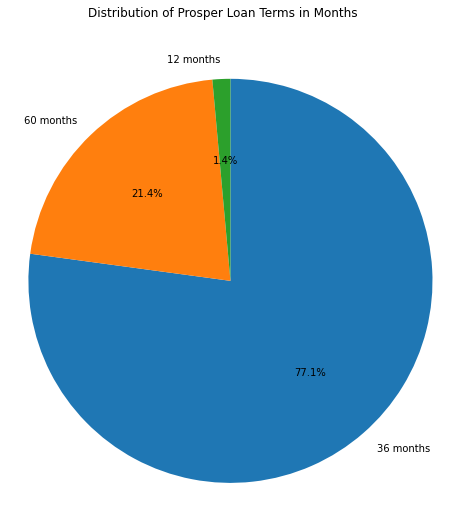

In [221]:
## Visualization of the value counts of the loan terms in the dataset
# A pie plot of the loan terms in the dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
label = [str(i)+' months' for i in focus_df.LoanTerm.value_counts().index]
ax.pie(focus_df.LoanTerm.value_counts(), labels = label, autopct = '%1.1f%%', startangle = 90, counterclock = False)
ax.axis('equal')
fig.suptitle('Distribution of Prosper Loan Terms in Months');

There are three loan terms (12 months, 36 months & 60 months) listed in the Prosper Loan Dataset. Approximately _77.1%_ of the loans listed were medium term (36 months), while the the least collected were short term loans of about 12 months _(~1.4%)_

#### 2. In which quarter where the loans listed in the Prosper Loan Dataset?

In [253]:
## Value count of the loan terms in the dataset
focus_df.LoanOriginationQuarter.value_counts()

Q4    30990
Q1    29240
Q3    27930
Q2    24906
Name: LoanOriginationQuarter, dtype: int64

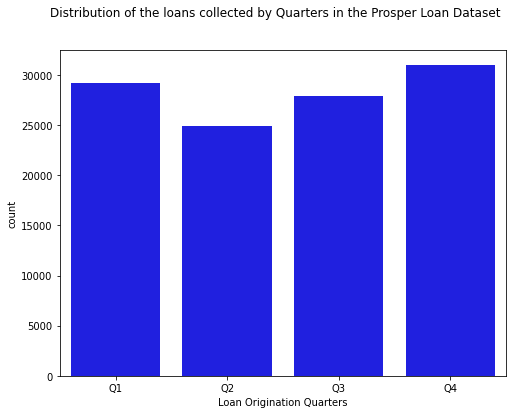

In [255]:
## Visualization of the LoanOriginationYear in the dataset
# A count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sb.countplot(data = focus_df, x = 'LoanOriginationQuarter', color = 'b', ax = ax)
ax.set_xlabel('Loan Origination Quarters')
#for i in range(n_counts.shape[0]):
 #   pct_string = '{:0.2f}'.format(n_counts[-i-1] * 100/n_vals)
  #  plt.text(i, n_counts[-i-1]+1000, pct_string, va='top')
fig.suptitle('Distribution of the loans collected by Quarters in the Prosper Loan Dataset');

_The second quarter seem to experience a fall in the counts of listed loans by the borrowers_

#### 3. During which years were the listing of the loans originated?

In [231]:
## Value count of the LoanOriginationYear in the dataset
focus_df.LoanOriginationYear.value_counts(ascending=True).reset_index().sort_values(by=['index'])

,index,LoanOriginationYear
0,2005,22
3,2006,5906
5,2007,11460
6,2008,11552
1,2009,2047
2,2010,5652
4,2011,11228
8,2012,19553
9,2013,33912
7,2014,11734


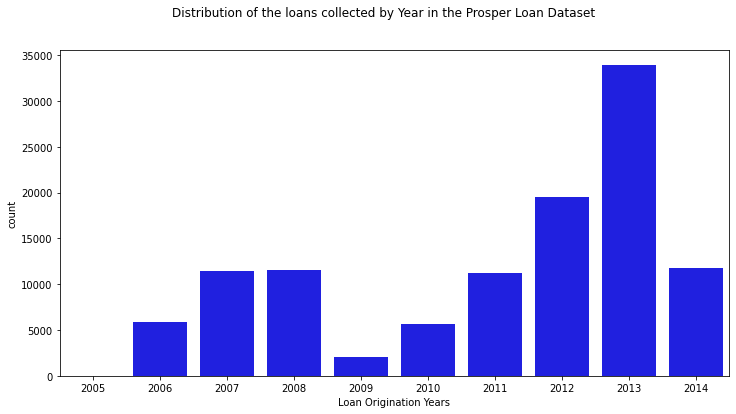

In [235]:
## Visualization of the LoanOriginationYear in the dataset
# A count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
#n_vals = focus_df.LoanOriginationYear.value_counts().sum()
#n_counts = focus_df.LoanOriginationYear.value_counts()
sb.countplot(data = focus_df, x = 'LoanOriginationYear', color = 'b', ax = ax)
ax.set_xlabel('Loan Origination Years')
#for i in range(n_counts.shape[0]):
 #   pct_string = '{:0.2f}'.format(n_counts[-i-1] * 100/n_vals)
  #  plt.text(i, n_counts[-i-1]+1000, pct_string, va='top')
fig.suptitle('Distribution of the loans collected by Year in the Prosper Loan Dataset');

_The listed loan counts dropped in the year 2009, rose steadily until 2013 before the next decrease in 2014. **What could account for this drop and increase?**_

#### 4. What is the status of the loans listed in the Prosper Loan Dataset?

In [222]:
## Value count of the loan status in the dataset
focus_df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

_There are 6 coded options for `Past Due (...)` which are greater then a day from the due date. These options will all be coded as `Past Due`_

##### Recode the `Past Due (...)` options as `Past Due` 

In [223]:
def LoanStatusRecoder( status ):
    if 'Past Due' in status:
        re_stat = 'Past Due'
    else:
        re_stat = status
    return re_stat

focus_df['LoanStatusRecode'] = focus_df.LoanStatus.apply(lambda x: LoanStatusRecoder(x))
focus_df.LoanStatusRecode.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due                   2057
FinalPaymentInProgress      203
Cancelled                     5
Name: LoanStatusRecode, dtype: int64

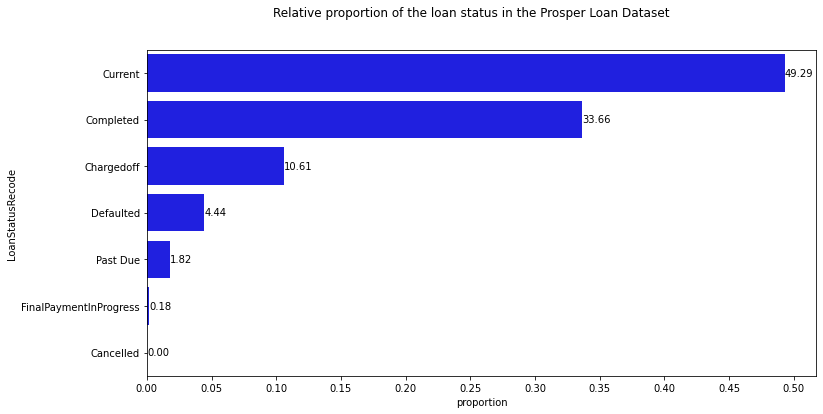

In [224]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n_vals = focus_df.LoanStatusRecode.value_counts().sum()
n_counts = focus_df.LoanStatusRecode.value_counts()
max_prop = n_counts[0]/n_vals
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
sb.countplot(data = focus_df, y = 'LoanStatusRecode', color = 'b', order = n_counts.index, ax = ax)
ax.set_xticks(tick_props * n_vals, tick_names)
ax.set_xlabel('proportion')
for i in range(n_counts.shape[0]):
    pct_string = '{:0.2f}'.format(n_counts[i] * 100/n_vals)
    plt.text(n_counts[i]+0.02, i, pct_string, va='center')
fig.suptitle('Relative proportion of the loan status in the Prosper Loan Dataset');

_Majority of the loans listed in the dataset are either 'Current' (49%) or 'Completed' (33%), while other loans are 'Charged off', 'Defaulted', 'Past Due'. Only 0.18% of the loans are in 'FinalPaymentInProgress' status_

#### 5. What are the ranges of the original amount borrowed in the Prosper Loan Dataset?

In [236]:
## Description of the Loan Original Amount by measures
focus_df.LoanOriginalAmount.describe().apply('{0:.2f}'.format)

count    113066.00
mean       8314.76
std        6237.01
min        1000.00
25%        4000.00
50%        6300.00
75%       12000.00
max       35000.00
Name: LoanOriginalAmount, dtype: object

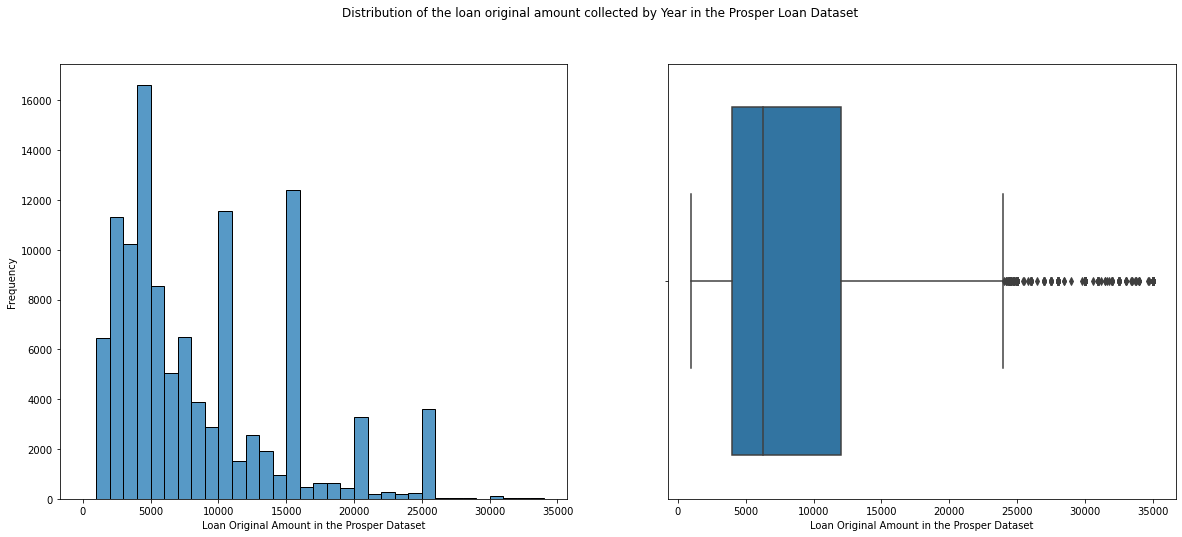

In [237]:
## Visualization of the LoanOriginalAmount in the dataset
# A histogram of the loan Original Amount in the dataset
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
bins = np.arange(0, focus_df.LoanOriginalAmount.max(), 1000) #Using the intervals of 1000
sb.histplot(data = focus_df, x = 'LoanOriginalAmount', bins = bins, ax = ax[0])
sb.boxplot(data = focus_df, x = 'LoanOriginalAmount', ax = ax[1])
ax[0].set_xlabel('Loan Original Amount in the Prosper Dataset');
ax[0].set_ylabel('Frequency');
ax[1].set_xlabel('Loan Original Amount in the Prosper Dataset');
fig.suptitle('Distribution of the loan original amount collected by Year in the Prosper Loan Dataset');

##### How many outliers are in the data based on the loan original amount?

In [238]:
## How many outliers are in the data based on the loan original amount?
def HowManyOutliers( data, column ):
    Q3 = np.quantile(data[column], 0.75)
    Q1 = np.quantile(data[column], 0.25)
    lower_boundary = Q1 - 1.5 *(Q3-Q1)
    upper_boundary = Q3 + 1.5 *(Q3-Q1)
    print(f"There are {len(data[data[column] < lower_boundary])} outliers lesser than the lower boundary of {lower_boundary}")
    print(f"There are {len(data[data[column] > upper_boundary])} outliers greater than the upper boundary of {upper_boundary}")
HowManyOutliers(focus_df, 'LoanOriginalAmount')

There are 0 outliers lesser than the lower boundary of -8000.0
There are 4336 outliers greater than the upper boundary of 24000.0


In [240]:
round(4336/113066*100, 2)

3.83

_The plots of the loan original amount show that 4,366 (~4%) loan borrowers listed loans above 24,000 which are outliers in this dataset. **Which years were the borrowers identified as outliers listed for?**_

#### 6. What is the distibution of the occupation of the borowers in the Prosper Loan Dataset?

In [241]:
## Value count of the Occupation in the dataset
focus_df.Occupation.value_counts()

Other                          31951
Professional                   13531
Computer Programmer             4442
Executive                       4280
Teacher                         3729
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [242]:
focus_df.Occupation.value_counts().index

Index(['Other', 'Professional', 'Computer Programmer', 'Executive', 'Teacher',
       'Administrative Assistant', 'Analyst', 'Sales - Commission',
       'Accountant/CPA', 'Clerical', 'Sales - Retail', 'Skilled Labor',
       'Retail Management', 'Nurse (RN)', 'Construction', 'Truck Driver',
       'Laborer', 'Police Officer/Correction Officer', 'Civil Service',
       'Engineer - Mechanical', 'Military Enlisted', 'Food Service Management',
       'Engineer - Electrical', 'Food Service', 'Medical Technician',
       'Attorney', 'Tradesman - Mechanic', 'Social Worker', 'Postal Service',
       'Professor', 'Realtor', 'Doctor', 'Nurse (LPN)', 'Nurse's Aide',
       'Tradesman - Electrician', 'Waiter/Waitress', 'Fireman', 'Scientist',
       'Military Officer', 'Bus Driver', 'Principal', 'Teacher's Aide',
       'Pharmacist', 'Student - College Graduate Student', 'Landscaping',
       'Engineer - Chemical', 'Investor', 'Architect',
       'Pilot - Private/Commercial', 'Clergy', 'Student -

_There are 67 listed types of occupation in the dataset. Plotting counts will be choke/muddled up with too many categories!_

##### Recode the occupation into economic sectors e.g `Students`, `Health` e.t.c

In [243]:
def OccupationSectorCode( occ ):
    if 'Student' in occ:
        re_occ = 'Students'
    elif 'Engineer' in occ or occ in ['Architect', 'Landscaping']:
        re_occ = 'Engineer'
    elif 'Tradesman' in occ:
        re_occ = 'Tradesman'
    elif 'Sales' in occ or occ in ['Car Dealer', 'Realtor', 'Retail Management', 'Investor']:
        re_occ = 'Sales & Retail'
    elif occ in ['Nurse (RN)', 'Nurse (LPN)', 'Nurse\'s Aide', 'Doctor', 'Dentist', 'Medical Technician']:
        re_occ = 'Medical'
    elif occ in ['Teacher', 'Professor', 'Scientist', 'Principal', 'Teacher\'s Aide', 'Pharmacist', 'Chemist', 'Biologist', 'Psychologist']:
        re_occ = 'Education & Research'
    elif occ in ['Clerical', 'Clergy', 'Religious']:
        re_occ = 'Religion'
    elif occ in ['Skilled Labor', 'Construction', 'Truck Driver', 'Laborer', 'Food Service Management',
                 'Food Service', 'Waiter/Waitress', 'Fireman', 'Homemaker', 'Bus Driver', 'Social Worker',
                'Postal Service', 'Pilot - Private/Commercial', 'Flight Attendant']:
        re_occ = 'Skilled Labour'
    elif occ in ['Military Enlisted', 'Military Officer']:
        re_occ = 'Military'
    elif occ in ['Attorney', 'Judge', 'Police Officer/Correction Officer']:
        re_occ = 'Law & Enforcement'
    elif occ in ['Computer Programmer', 'Analyst']:
        re_occ = 'Technology'
    else:
        re_occ = occ
    return re_occ

focus_df['OccupationSector'] = focus_df.Occupation.apply(lambda x: OccupationSectorCode(x))
focus_df.OccupationSector.value_counts()

Other                       31951
Professional                13531
Skilled Labour              13049
Sales & Retail               9698
Technology                   8020
Education & Research         5901
Medical                      5117
Executive                    4280
Administrative Assistant     3677
Religion                     3454
Accountant/CPA               3209
Engineer                     3183
Law & Enforcement            2616
Tradesman                    1632
Military                     1606
Civil Service                1445
Students                      697
Name: OccupationSector, dtype: int64

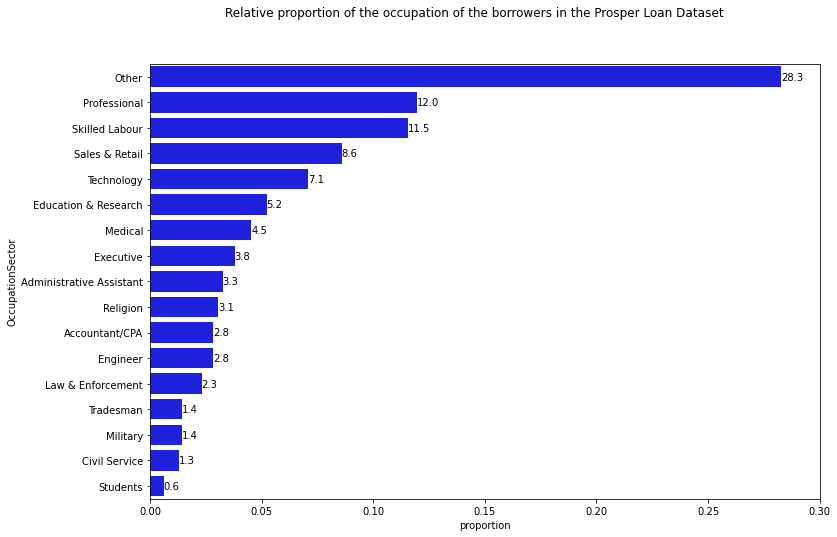

In [245]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal box plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
n_vals = focus_df.OccupationSector.value_counts().sum()
n_counts = focus_df.OccupationSector.value_counts()
max_prop = n_counts[0]/n_vals
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]

sb.countplot(data = focus_df, y = 'OccupationSector', color = 'b', order = focus_df.OccupationSector.value_counts().index, ax = ax)
ax.set_xticks(tick_props * n_vals, tick_names)
ax.set_xlabel('proportion')
for i in range(n_counts.shape[0]):
    pct_string = '{:0.1f}'.format(n_counts[i] * 100/n_vals)
    ax.text(n_counts[i], i, pct_string, va='center')
#ax[0].set(frame_on=False)
#ax[1].set(frame_on=False)
fig.suptitle('Relative proportion of the occupation of the borrowers in the Prosper Loan Dataset');

#### 7. What is the distibution of the Employment Status of the borowers in the Prosper Loan Dataset?

In [246]:
## Value count of the Occupation in the dataset
focus_df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Not Available     2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

_`Not Available` and `Not avalable` are similar and need to be defined as `Not Available`_

##### Recode the label _`Not available`_ value to _`Not Available`_

In [247]:
focus_df['EmploymentStatus'] = focus_df['EmploymentStatus'].apply(lambda x: x if x != 'Not available' else 'Not Available')
focus_df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Not Available     7602
Self-employed     6052
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

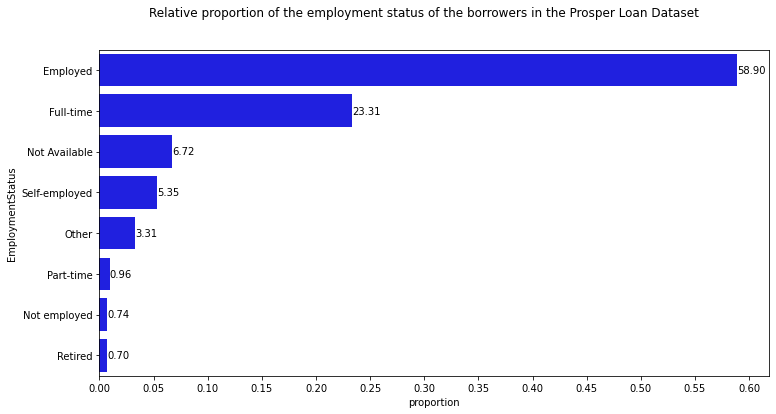

In [248]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
n_vals = focus_df.EmploymentStatus.value_counts().sum()
n_counts = focus_df.EmploymentStatus.value_counts()
max_prop = n_counts[0]/n_vals
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
sb.countplot(data = focus_df, y = 'EmploymentStatus', color = 'b', order = n_counts.index, ax = ax)
ax.set_xticks(tick_props * n_vals, tick_names)
ax.set_xlabel('proportion')
for i in range(n_counts.shape[0]):
    pct_string = '{:0.2f}'.format(n_counts[i] * 100/n_vals)
    plt.text(n_counts[i]+0.02, i, pct_string, va='center')
fig.suptitle('Relative proportion of the employment status of the borrowers in the Prosper Loan Dataset');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of the Prosper loans were of three types: 12, 36, and 60 months and these werer listed between 2005 and 2014. The status of majority of the loans listed were either as 'Current' or 'Completed', while other loans are 'Charged off', 'Defaulted', 'Past Due'. Less than 1% of the loans were in listed in the 'FinalPaymentInProgress' state. The borrowers of the loan covered a very large area of occupation from Professionals to Skilled Workers to Administrative Assistants, as well as Students. More than half of the borrowers of the Prosper loan are Employed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- `LoanStatus`:
>- `Occupation`
>- `LoanOriginalAmount`

<a id='bi'></a>
## Bivariate Exploration

In [297]:
grp = focus_df.groupby(['LoanTerm', 'OccupationSector']).size().reset_index(name='count')
grp = grp.pivot(index = 'OccupationSector', columns = 'LoanTerm', values = 'count')
print(grp)

LoanTerm                   12     36    60
OccupationSector                          
Accountant/CPA             59   2406   744
Administrative Assistant   39   2946   692
Civil Service              24   1029   392
Education & Research       81   4510  1310
Engineer                   73   2371   739
Executive                  76   3139  1065
Law & Enforcement          33   1853   730
Medical                    69   3842  1206
Military                   23   1315   268
Other                     369  25260  6322
Professional              230  10116  3185
Religion                   20   2811   623
Sales & Retail            127   7623  1948
Skilled Labour            171   9996  2882
Students                   11    654    32
Technology                203   6202  1615
Tradesman                   6   1151   475


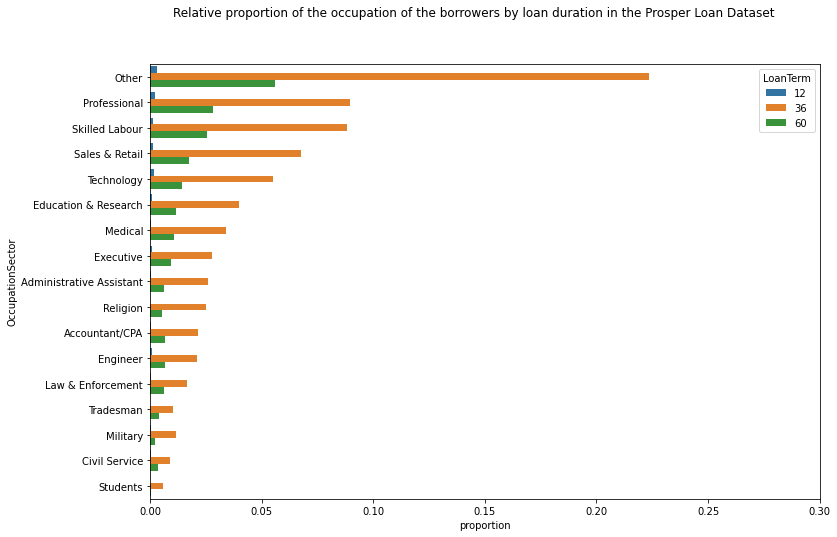

In [298]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal box plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
n_vals = focus_df.OccupationSector.value_counts().sum()
n_counts = focus_df.OccupationSector.value_counts()
max_prop = n_counts[0]/n_vals
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]

sb.countplot(data = focus_df, y = 'OccupationSector', hue='LoanTerm', order = focus_df.OccupationSector.value_counts().index, ax = ax)
ax.set_xticks(tick_props * n_vals, tick_names)
ax.set_xlabel('proportion')
fig.suptitle('Relative proportion of the occupation of the borrowers by loan duration in the Prosper Loan Dataset');

In [299]:
grp = focus_df.groupby(['LoanTerm', 'EmploymentStatus']).size().reset_index(name='count')
grp = grp.pivot(index = 'EmploymentStatus', columns = 'LoanTerm', values = 'count')
print(grp)

LoanTerm            12     36     60
EmploymentStatus                    
Employed          1298  43483  21817
Full-time          128  25662    564
Not Available        0   7602      0
Not employed        26    695    114
Other               49   2854    839
Part-time            1   1073     14
Retired              1    773     21
Self-employed      111   5082    859


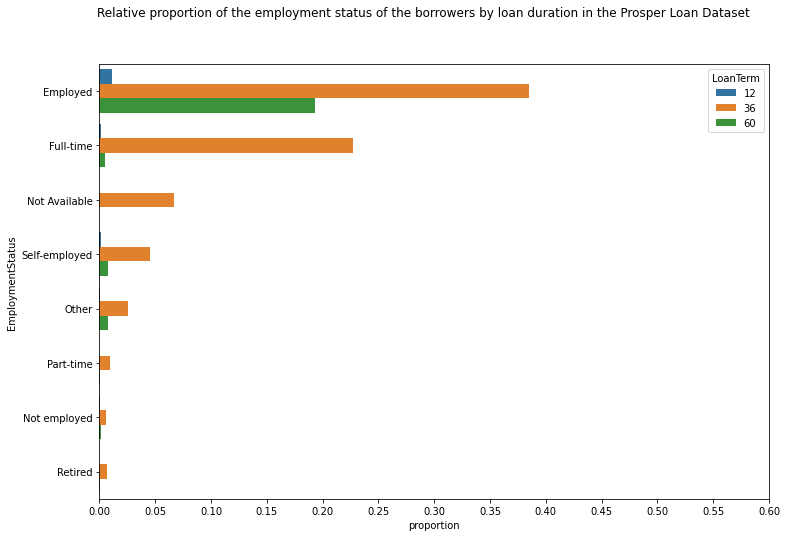

In [300]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal box plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
n_vals = focus_df.EmploymentStatus.value_counts().sum()
n_counts = focus_df.EmploymentStatus.value_counts()
max_prop = n_counts[0]/n_vals
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(i) for i in tick_props]

sb.countplot(data = focus_df, y = 'EmploymentStatus', hue='LoanTerm', order = focus_df.EmploymentStatus.value_counts().index, ax = ax)
ax.set_xticks(tick_props * n_vals, tick_names)
ax.set_xlabel('proportion')
fig.suptitle('Relative proportion of the employment status of the borrowers by loan duration in the Prosper Loan Dataset');

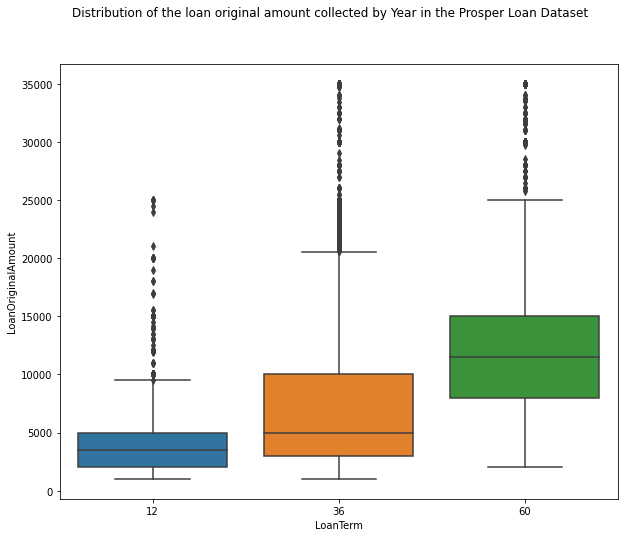

In [307]:
## Visualization of the LoanOriginalAmount in the dataset
# A histogram of the loan Original Amount in the dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
bins = np.arange(0, focus_df.LoanOriginalAmount.max(), 1000) #Using the intervals of 1000
#sb.histplot(data = focus_df, y = 'LoanOriginalAmount', x = 'LoanTerm', bins = bins, ax = ax[0])
sb.boxplot(data = focus_df, y = 'LoanOriginalAmount', x = 'LoanTerm', ax = ax)
#ax.set_xlabel('Loan Original Amount in the Prosper Dataset');#
#ax[0].set_ylabel('Frequency');
#ax[1].set_xlabel('Loan Original Amount in the Prosper Dataset');
fig.suptitle('Distribution of the loan original amount collected by Year in the Prosper Loan Dataset');

#### 8. What are the termly performance of the loans by their completion status?

LoanTerm                  12     36     60
LoanStatusRecode                          
Cancelled                  0      5      0
Chargedoff                72  10834   1086
Completed               1450  34191   2420
Current                   62  35852  19816
Defaulted                 10   4822    186
FinalPaymentInProgress    10    155     38
Past Due                  10   1365    682


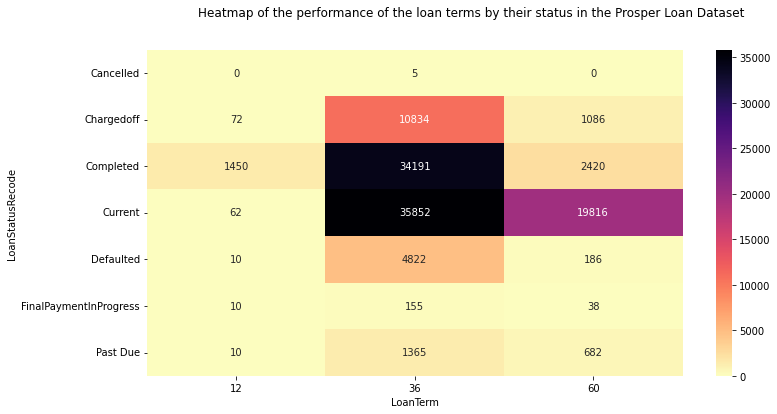

In [273]:
## Visualization of the proportion of the Loan Status in the dataset
# A heatmap plot of the loan Status by duration in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
#sb.countplot(data = focus_df, x = 'LoanTerm', hue = 'LoanStatus', ax = ax[0])
grp = focus_df.groupby(['LoanTerm', 'LoanStatusRecode']).size().reset_index(name='count')
grp = grp.pivot(index = 'LoanStatusRecode', columns = 'LoanTerm', values = 'count')
print(grp)
sb.heatmap(grp, annot = True, fmt = '.0f', cmap = 'magma_r', ax = ax);
fig.suptitle('Heatmap of the performance of the loan terms by their status in the Prosper Loan Dataset');

* _a. 1450 out of the 1614 (~89%) short term loans for 12 months had been completed (ref Q1), and 10 in the process of final payment. 62 of these short term loans were still current (3.8%), 72 were charged off and, none was cancelled._
* _b. ~5.5% of the medium term loans (4822 out of 87224) were defaulted in the Prosper loan dataset (ref Q1)
* _c. Approximately 82% of the long term loans for 60 months (ref Q1) were still current and ~10% (2420 out of 24228) were completed.

#### 9. What is the quarterly origination of the loans over the years? 

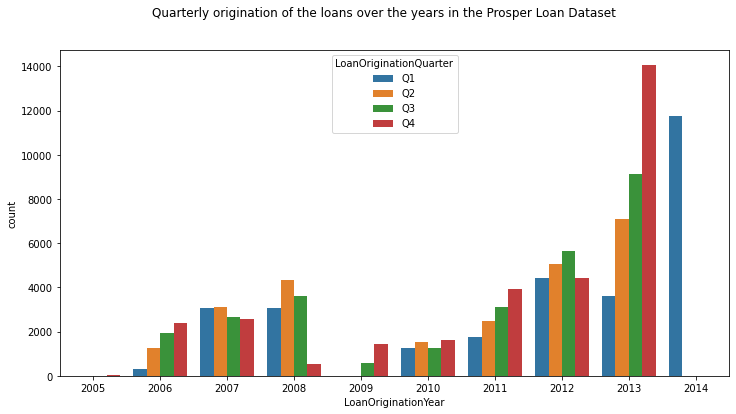

In [249]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sb.countplot(data = focus_df, x = 'LoanOriginationYear', hue = 'LoanOriginationQuarter', ax = ax);
fig.suptitle('Quarterly origination of the loans over the years in the Prosper Loan Dataset');

* _a. The inintial lisiting of the loans in 2005 were in the last quarter of the year_
* _b. The decline in the number of loans listed in 2009 (ref Q3) could be due to the reduced number of loans in the fourth quarter of 2008 and extending to the second quarter of 2009._
* _c. The decline in the number of loans listed in 2014 (ref Q3) could also be to the documented loans listed only for the first quarter of 2014_

#### 10. What are the yearly performance of the loans by their completion status?

In [290]:
grp = focus_df.groupby(['LoanOriginationYear', 'LoanStatusRecode']).size().reset_index(name='count')
grp = grp.pivot(index = 'LoanStatusRecode', columns = 'LoanOriginationYear', values = 'count')
print(grp)

LoanOriginationYear     2005  2006  2007  2008  2009  2010  2011   2012  \
LoanStatusRecode                                                          
Cancelled                  0     4     0     1     0     0     0      0   
Chargedoff                 0   952  2938  2758   232   750  1798   2265   
Completed                 22  3577  6936  7743  1736  4688  5488   5518   
Current                    0     0     0     0     0    19  3261  10487   
Defaulted                  0  1373  1586  1050    79   187   347    357   
FinalPaymentInProgress     0     0     0     0     0     0    39     54   
Past Due                   0     0     0     0     0     8   295    872   

LoanOriginationYear      2013   2014  
LoanStatusRecode                      
Cancelled                   0      0  
Chargedoff                299      0  
Completed                2285     68  
Current                 30332  11631  
Defaulted                  39      0  
FinalPaymentInProgress     93     17  
Past Due    

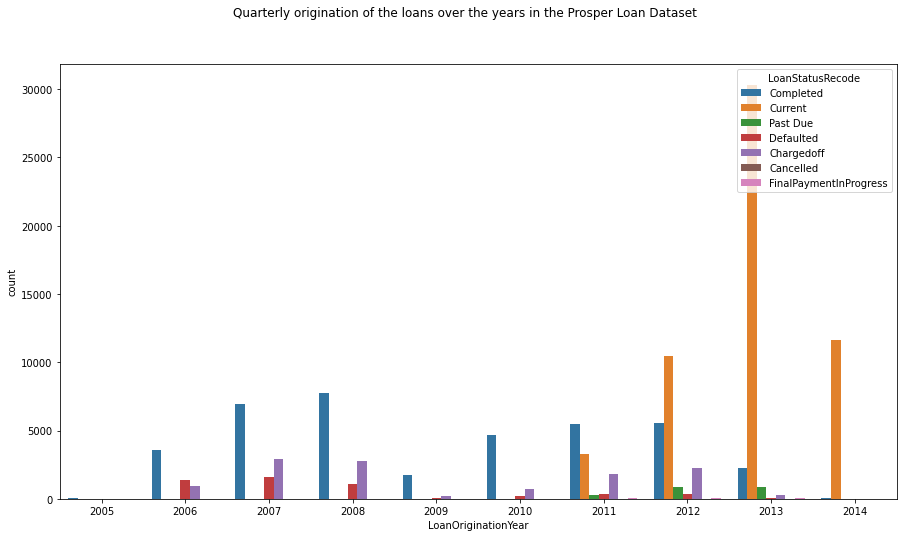

In [283]:
## Visualization of the proportion of the Loan Status in the dataset
# A horizontal count plot of the loan Status in the dataset
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sb.countplot(data = focus_df, x = 'LoanOriginationYear', hue = 'LoanStatusRecode', ax = ax)
fig.suptitle('Yearly performance of the loans in the Prosper Loan Dataset');

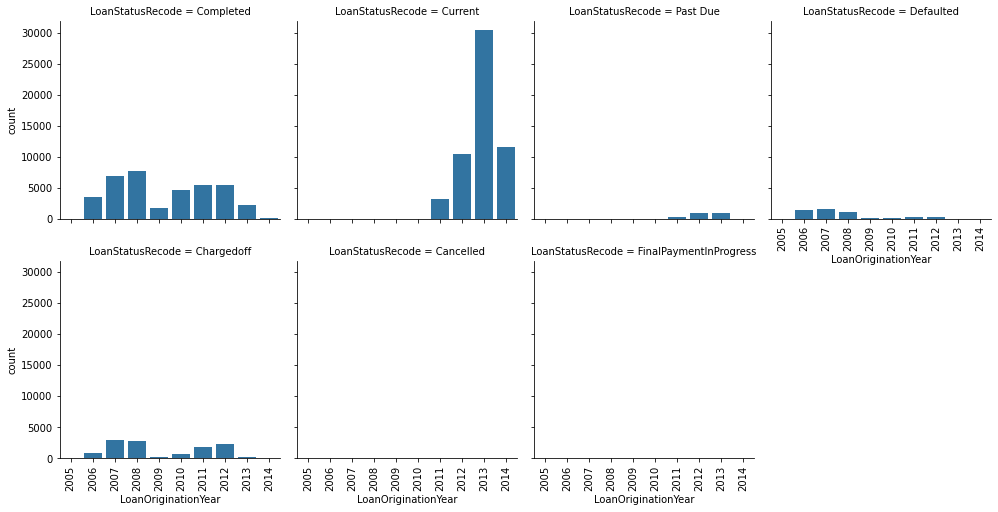

In [308]:
g = sb.FacetGrid(focus_df, col="LoanStatusRecode", height=3.5, col_wrap=4)
g.map_dataframe(sb.countplot, x="LoanOriginationYear")
g.set_xticklabels(rotation=90);

_A lot of the counts are not visible from the plot_

#### 11. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

